#Zephaniah Spencer | Homework 1 | 800990063

#Setup Commands

##Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Problem 1

Image display code taken from [pytorch docs](https://pytorch.org/vision/stable/auto_examples/plot_scripted_tensor_transforms.html#sphx-glr-auto-examples-plot-scripted-tensor-transforms-py)

In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T
from torchvision.io import read_image


plt.rcParams["savefig.bbox"] = 'tight'
torch.manual_seed(1)


def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = T.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

## 1.b Read in each image as a tensor

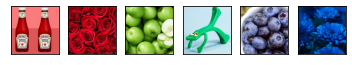

In [ ]:
currentDir = '/content/drive/MyDrive/Documents/School/AI/Homework 1/Images/Problem1'

r1 = read_image(str(Path(currentDir) / 'r-1.jpg'))
r2 = read_image(str(Path(currentDir) / 'r-2.jpg'))
g1 = read_image(str(Path(currentDir) / 'g-1.jpg'))
g2 = read_image(str(Path(currentDir) / 'g-2.jpg'))
b1 = read_image(str(Path(currentDir) / 'b-1.jpg'))
b2 = read_image(str(Path(currentDir) / 'b-2.jpg'))

imgList = [r1,r2,g1,g2,b1,b2]

show(imgList)

## 1.c Get the mean for all pixels of the input image

In [ ]:
for i in imgList:
  # Convert to float so we can get mean for the whole image
  i = i.float()
  print(torch.mean(i))

tensor(133.0581)
tensor(58.3054)
tensor(120.7555)
tensor(188.3451)
tensor(117.6672)
tensor(61.9287)


## 1.d Get the mean for each channel of the input image

In [ ]:
def rgbMean(r,g,b):
  r = torch.mean(r)
  g = torch.mean(g)
  b = torch.mean(b)

  return r,g,b

for count, i in enumerate(imgList):
  # Convert to float so we can get mean for the whole image
  i = i.float()
  r,g,b = rgbMean(i[0],i[1],i[2])
  print("Image " + str(count))
  print("R Mean: " + str(r))
  print("G Mean: " + str(g))
  print("B Mean: " + str(b))

Image 0
R Mean: tensor(205.6693)
G Mean: tensor(97.4072)
B Mean: tensor(96.0978)
Image 1
R Mean: tensor(146.8587)
G Mean: tensor(7.0099)
B Mean: tensor(21.0476)
Image 2
R Mean: tensor(126.0019)
G Mean: tensor(167.9092)
B Mean: tensor(68.3555)
Image 3
R Mean: tensor(148.0143)
G Mean: tensor(212.6527)
B Mean: tensor(204.3681)
Image 4
R Mean: tensor(108.1877)
G Mean: tensor(109.0495)
B Mean: tensor(135.7644)
Image 5
R Mean: tensor(1.9798)
G Mean: tensor(55.0607)
B Mean: tensor(128.7457)


#Problem 2

## Baseline model

In [ ]:
%matplotlib inline
import numpy as np
import torch

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.1 * t_u

def linear_model(t_u, w, b):
    return w * t_u + b   

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

# Baseline Linear Training Loop
def linear_training_loop(n_epochs, learning_rate, params, t_u, t_c,
                  print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = linear_model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)

        params = params - learning_rate * grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)

        if not torch.isfinite(loss).all():
            break
            
    return params

### Run the linear training loop

In [ ]:
params = linear_training_loop(
    n_epochs = 5000, 
    learning_rate = 2e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c,
    print_params = False)

print(params)

Epoch 500, Loss 3.829005
Epoch 1000, Loss 2.957627
Epoch 1500, Loss 2.928643
Epoch 2000, Loss 2.927679
Epoch 2500, Loss 2.927648
Epoch 3000, Loss 2.927644
Epoch 3500, Loss 2.927646
Epoch 4000, Loss 2.927646
Epoch 4500, Loss 2.927646
Epoch 5000, Loss 2.927646
tensor([  5.3677, -17.3045])


In [ ]:
params = linear_training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c,
    print_params = False)

print(params)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927680
Epoch 4500, Loss 2.927651
Epoch 5000, Loss 2.927648
tensor([  5.3671, -17.3012])


In [ ]:
params = linear_training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-3, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c,
    print_params = False)

print(params)

Epoch 500, Loss 25.644270
Epoch 1000, Loss 22.094957
Epoch 1500, Loss 19.100206
Epoch 2000, Loss 16.573353
Epoch 2500, Loss 14.441303
Epoch 3000, Loss 12.642381
Epoch 3500, Loss 11.124518
Epoch 4000, Loss 9.843812
Epoch 4500, Loss 8.763214
Epoch 5000, Loss 7.851448
tensor([ 4.0435, -9.8084])


In [ ]:
params = linear_training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c,
    print_params = False)

print(params)

Epoch 500, Loss 29.505890
Epoch 1000, Loss 28.943773
Epoch 1500, Loss 28.505281
Epoch 2000, Loss 28.074451
Epoch 2500, Loss 27.650877
Epoch 3000, Loss 27.234444
Epoch 3500, Loss 26.825020
Epoch 4000, Loss 26.422497
Epoch 4500, Loss 26.026747
Epoch 5000, Loss 25.637672
tensor([ 2.5233, -1.2029])


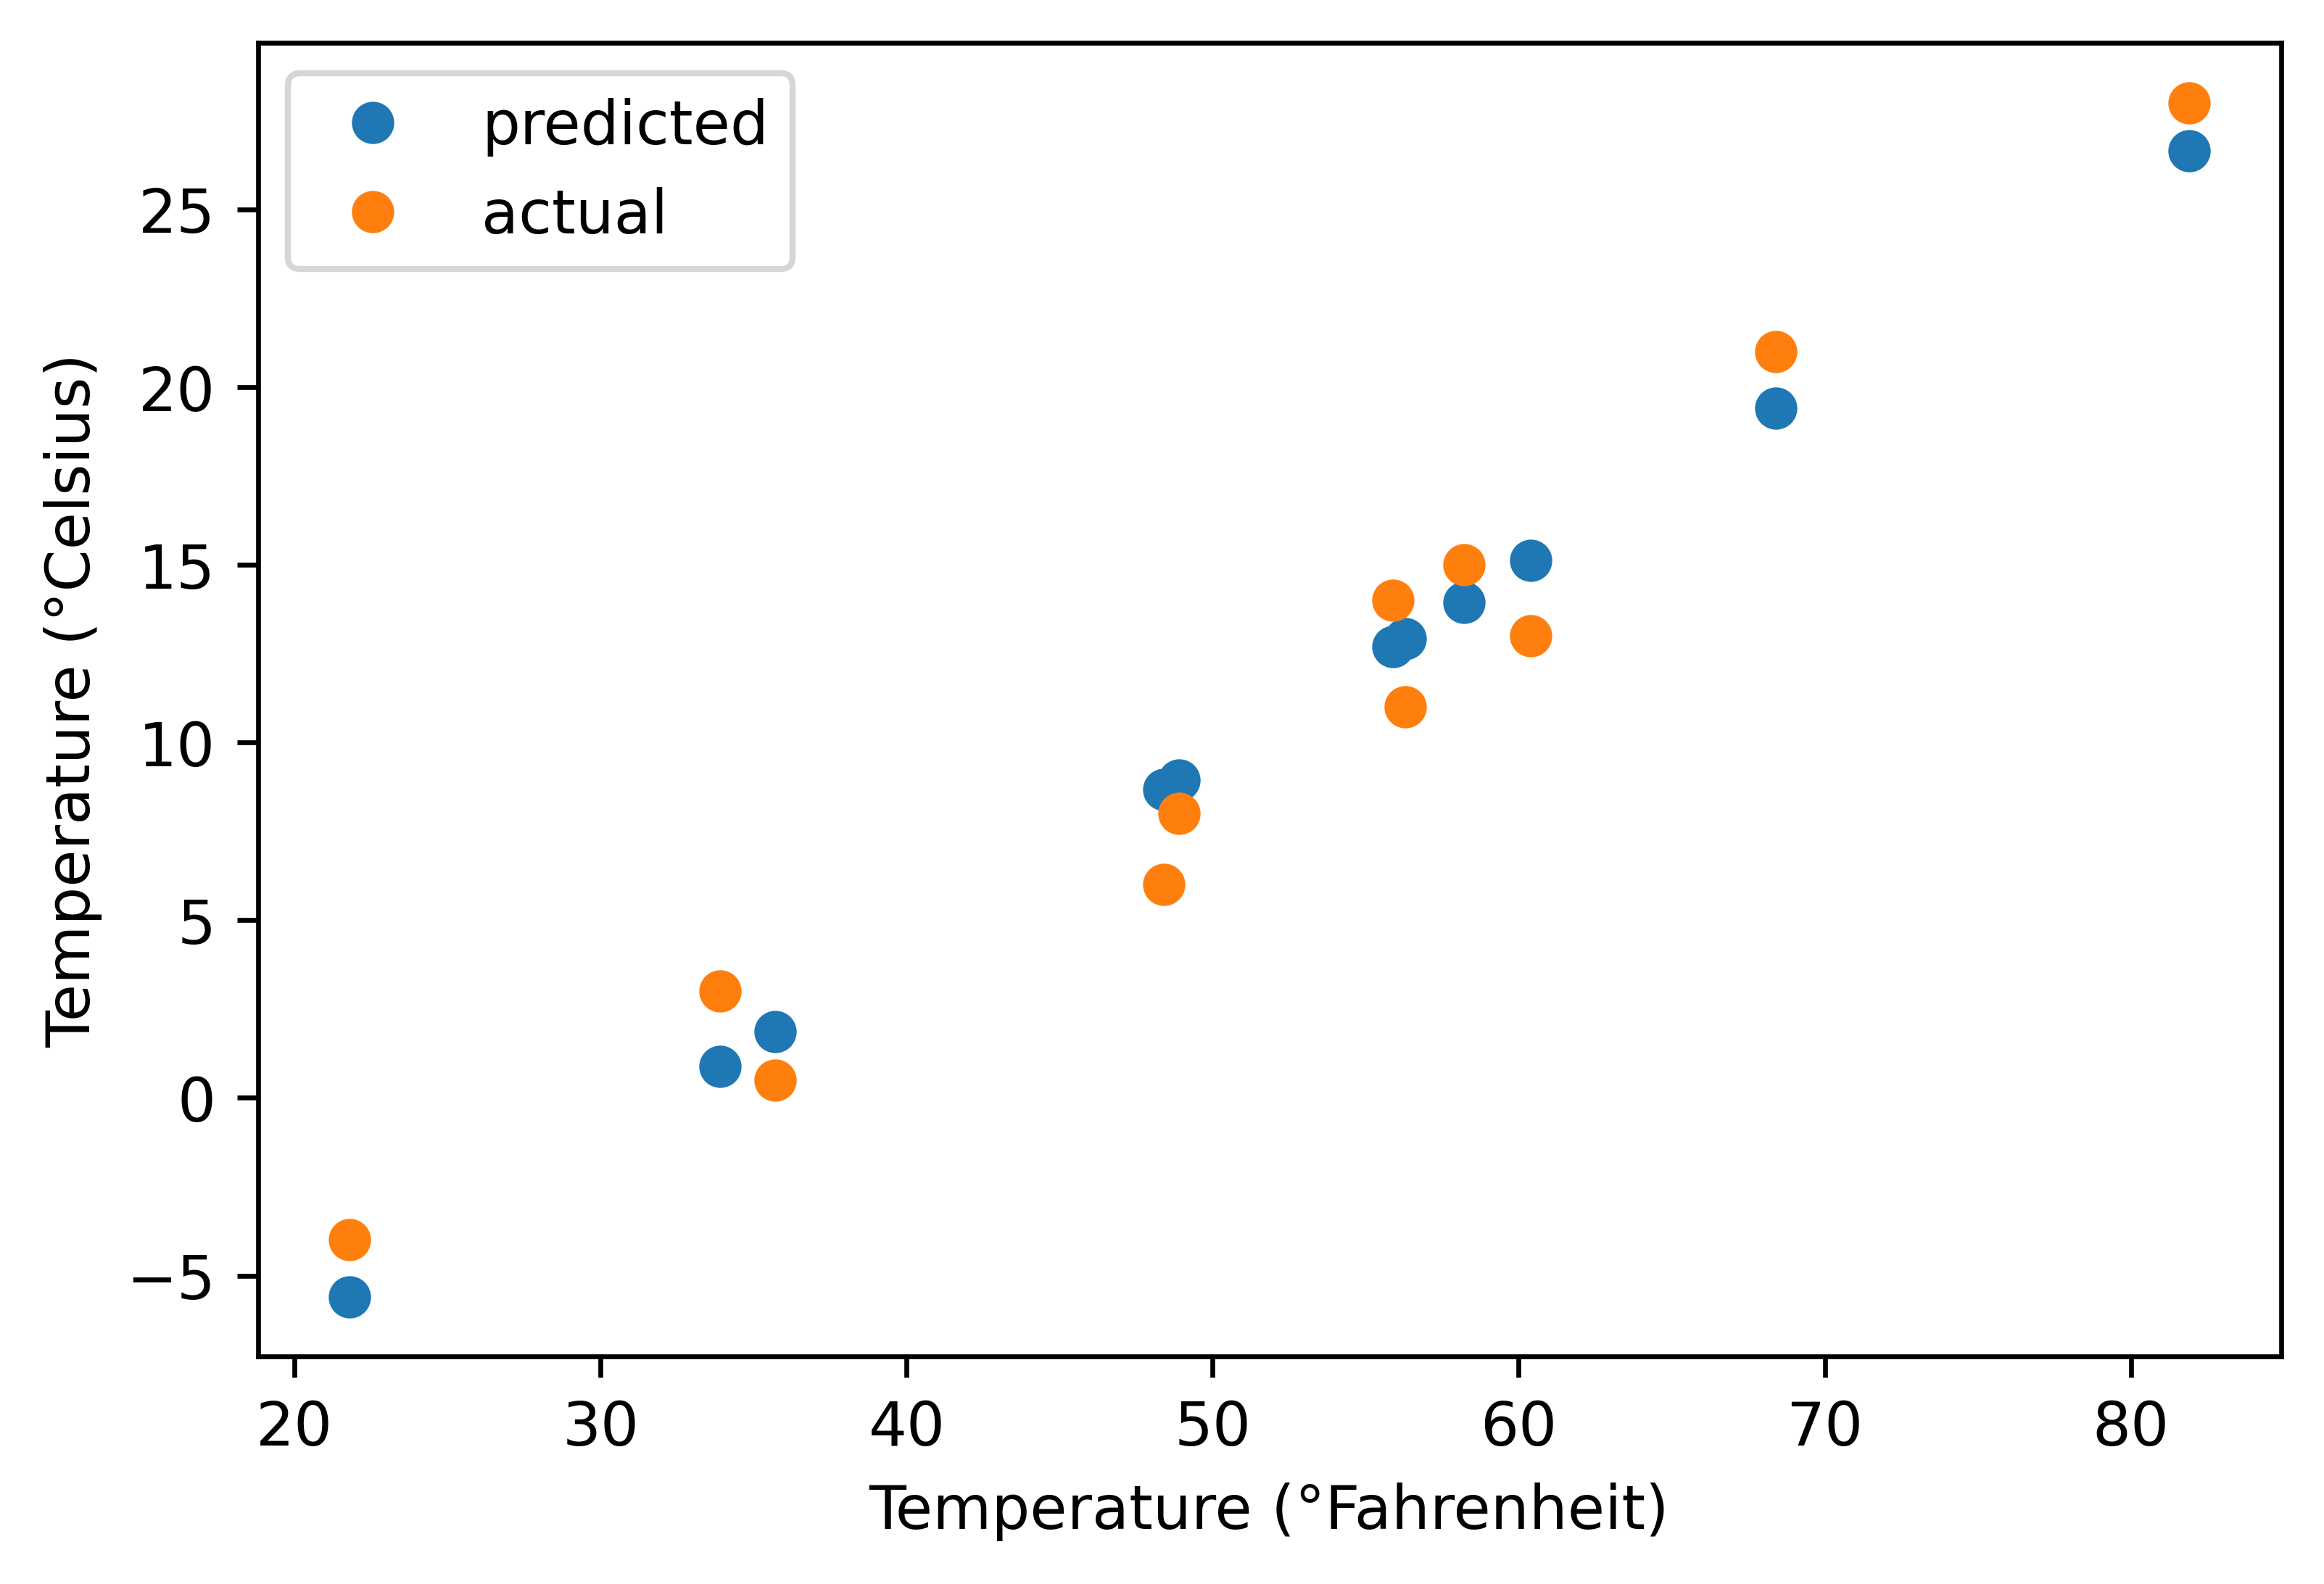

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = linear_model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy(), 'o', label='predicted')
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label='actual')
plt.legend(loc="upper left")
plt.savefig("problem2_baseline.png", format="png")

##Quadratic Model

In [ ]:
%matplotlib inline
import numpy as np
import torch

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.1 * t_u

def model(t_u, w1, w2, b):
    # return w * t_u + b
    return (w2 * t_u) ** 2 + w1 * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def training_loop(n_epochs, learning_rate, params, t_u, t_c):

    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params



In [ ]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 3e-4, 
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True), 
    t_u = t_un,
    t_c = t_c)

print(params)

Epoch 500, Loss 7.913108
Epoch 1000, Loss 5.087285
Epoch 1500, Loss 4.072381
Epoch 2000, Loss 3.704160
Epoch 2500, Loss 3.566077
Epoch 3000, Loss 3.509800
Epoch 3500, Loss 3.482625
Epoch 4000, Loss 3.465823
Epoch 4500, Loss 3.452766
Epoch 5000, Loss 3.441089
tensor([-1.1627, -0.7821, -1.3301], requires_grad=True)


In [ ]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 2e-4, 
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True), 
    t_u = t_un,
    t_c = t_c)

print(params)

Epoch 500, Loss 9.058428
Epoch 1000, Loss 6.315084
Epoch 1500, Loss 4.929408
Epoch 2000, Loss 4.229131
Epoch 2500, Loss 3.873750
Epoch 3000, Loss 3.691649
Epoch 3500, Loss 3.596528
Epoch 4000, Loss 3.545062
Epoch 4500, Loss 3.515501
Epoch 5000, Loss 3.496945
tensor([-1.1632,  0.7792, -1.1518], requires_grad=True)


In [ ]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True), 
    t_u = t_un,
    t_c = t_c)

print(params)

Epoch 500, Loss 11.106543
Epoch 1000, Loss 8.913606
Epoch 1500, Loss 7.352893
Epoch 2000, Loss 6.243305
Epoch 2500, Loss 5.454787
Epoch 3000, Loss 4.894433
Epoch 3500, Loss 4.496065
Epoch 4000, Loss 4.212616
Epoch 4500, Loss 4.010658
Epoch 5000, Loss 3.866467
tensor([-0.8793,  0.7456, -0.8838], requires_grad=True)


In [ ]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-5, 
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True), 
    t_u = t_un,
    t_c = t_c)

print(params)

Epoch 500, Loss 13.768494
Epoch 1000, Loss 13.426168
Epoch 1500, Loss 13.095132
Epoch 2000, Loss 12.775021
Epoch 2500, Loss 12.465487
Epoch 3000, Loss 12.166204
Epoch 3500, Loss 11.876838
Epoch 4000, Loss 11.597067
Epoch 4500, Loss 11.326587
Epoch 5000, Loss 11.065093
tensor([ 0.5922,  0.5543, -0.1647], requires_grad=True)


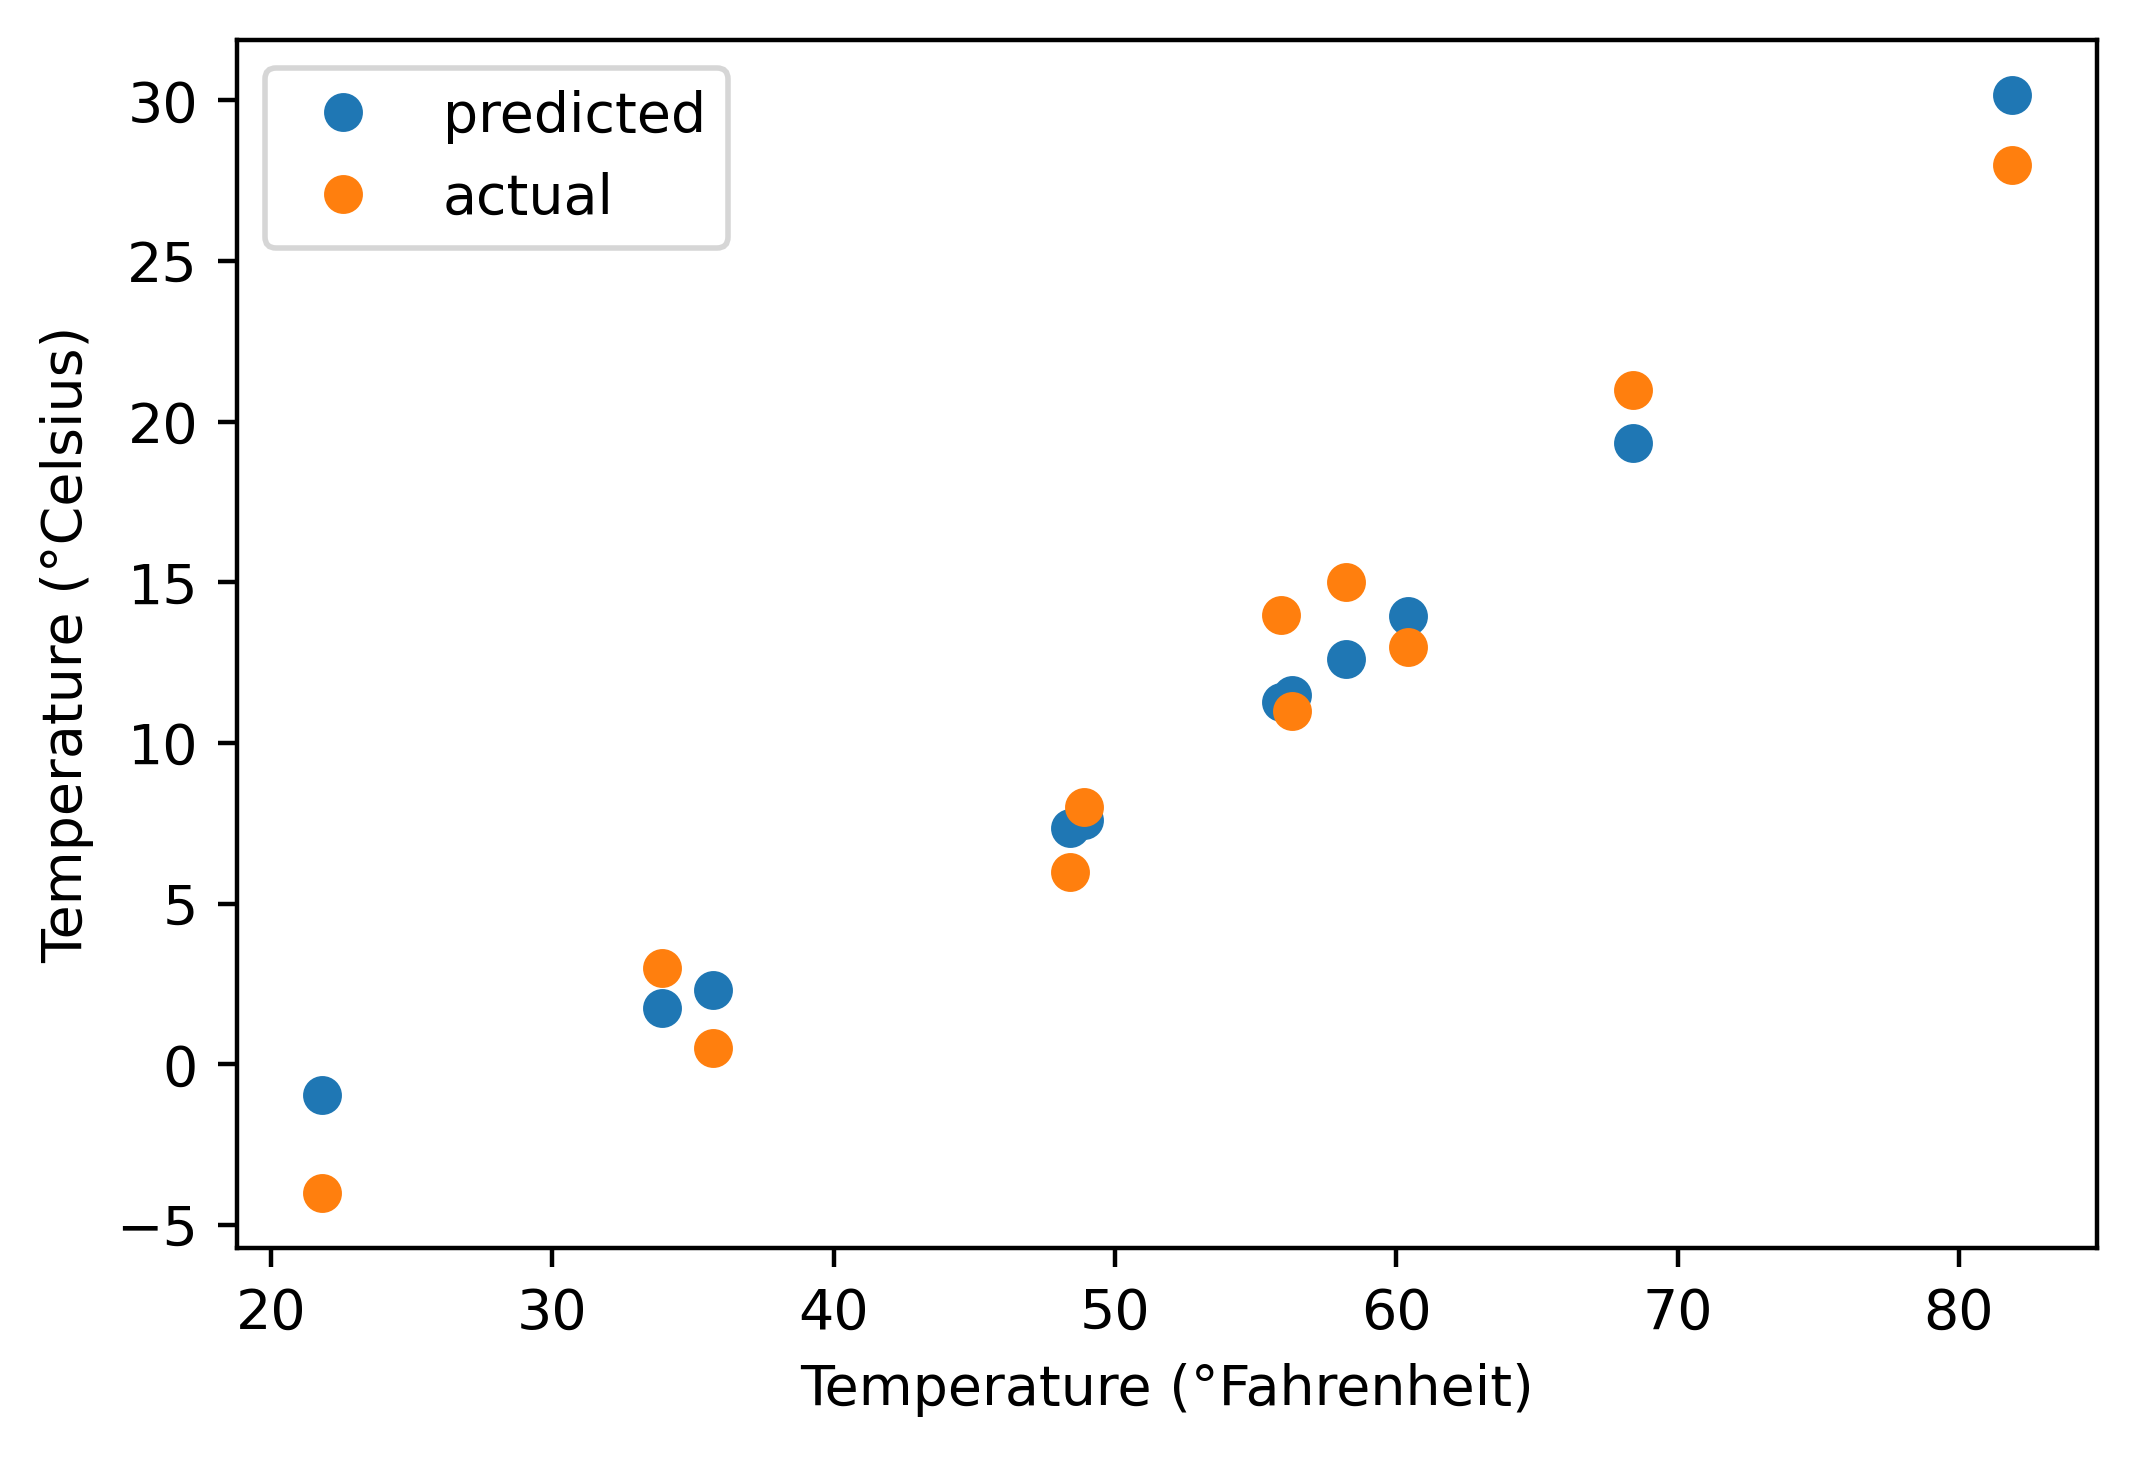

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)

fig = plt.figure(dpi=400)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy(), 'o', label='predicted')
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label='actual')
plt.legend(loc="upper left")
plt.savefig("problem2_quadratic.png", format="png")

#Problem 3

In [ ]:
from PIL.Image import new
import numpy as np
import pandas as pd

housingDataset = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Documents/School/AI/Homework 1/housing.csv"))
housingDataset.head()

trainingVars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
trainingSet = housingDataset[trainingVars]
validationSet = housingDataset['price']

t_u = torch.tensor(np.transpose(np.asarray(trainingSet)))
t_c = torch.tensor(np.asarray(validationSet))

t_un = t_u * .1
t_cn = t_c

# print(trainingSet[0])

print(trainingSet.shape)
print(validationSet.shape)

(545, 5)
(545,)


In [ ]:
%matplotlib inline
import numpy as np
import torch

import torch.optim as optim

def model(t_u, w0, w1, w2, w3, w4, b):
    return w4*t_u[4] + w3*t_u[3] + w2*t_u[2] + w1*t_u[1] + w0*t_u[0] + b

def loss_fn(t_p, t_c):
    squared_diffs = abs(t_p - t_c)
    return squared_diffs.mean()

def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [ ]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 2e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_cn)

Epoch 500, Loss 2260046.000000
Epoch 1000, Loss 1440683.375000
Epoch 1500, Loss 1352374.500000
Epoch 2000, Loss 1343555.500000
Epoch 2500, Loss 1343228.375000
Epoch 3000, Loss 1343211.750000
Epoch 3500, Loss 1343211.625000
Epoch 4000, Loss 1343211.375000
Epoch 4500, Loss 1343211.000000
Epoch 5000, Loss 1343210.500000


tensor([8.9508e+03, 1.1163e+01, 5.9660e+00, 8.6790e+00, 3.0254e+00, 3.1180e+01],
       requires_grad=True)

In [ ]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_cn)

Epoch 500, Loss 3442456.250000
Epoch 1000, Loss 2258437.000000
Epoch 1500, Loss 1649309.125000
Epoch 2000, Loss 1440626.000000
Epoch 2500, Loss 1371049.625000
Epoch 3000, Loss 1352382.250000
Epoch 3500, Loss 1345253.250000
Epoch 4000, Loss 1343557.500000
Epoch 4500, Loss 1343319.750000
Epoch 5000, Loss 1343230.625000


tensor([8.9452e+03, 8.3502e+00, 4.4070e+00, 6.0869e+00, 2.5297e+00, 2.3485e+01],
       requires_grad=True)

In [ ]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-3
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_cn)

Epoch 500, Loss 4633837.000000
Epoch 1000, Loss 4501198.500000
Epoch 1500, Loss 4368552.000000
Epoch 2000, Loss 4235906.000000
Epoch 2500, Loss 4103275.000000
Epoch 3000, Loss 3970644.000000
Epoch 3500, Loss 3838013.500000
Epoch 4000, Loss 3705381.000000
Epoch 4500, Loss 3572718.500000
Epoch 5000, Loss 3440056.750000


tensor([2.5763e+03, 2.4826e+00, 1.6431e+00, 1.9030e+00, 1.3469e+00, 4.9998e+00],
       requires_grad=True)

In [ ]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_cn)

Epoch 500, Loss 4752976.000000
Epoch 1000, Loss 4739712.000000
Epoch 1500, Loss 4726447.000000
Epoch 2000, Loss 4713183.500000
Epoch 2500, Loss 4699919.000000
Epoch 3000, Loss 4686656.500000
Epoch 3500, Loss 4673394.000000
Epoch 4000, Loss 4660132.000000
Epoch 4500, Loss 4646869.500000
Epoch 5000, Loss 4633607.000000


tensor([258.5114,   1.1484,   1.0644,   1.0900,   1.0346,   0.5000],
       requires_grad=True)

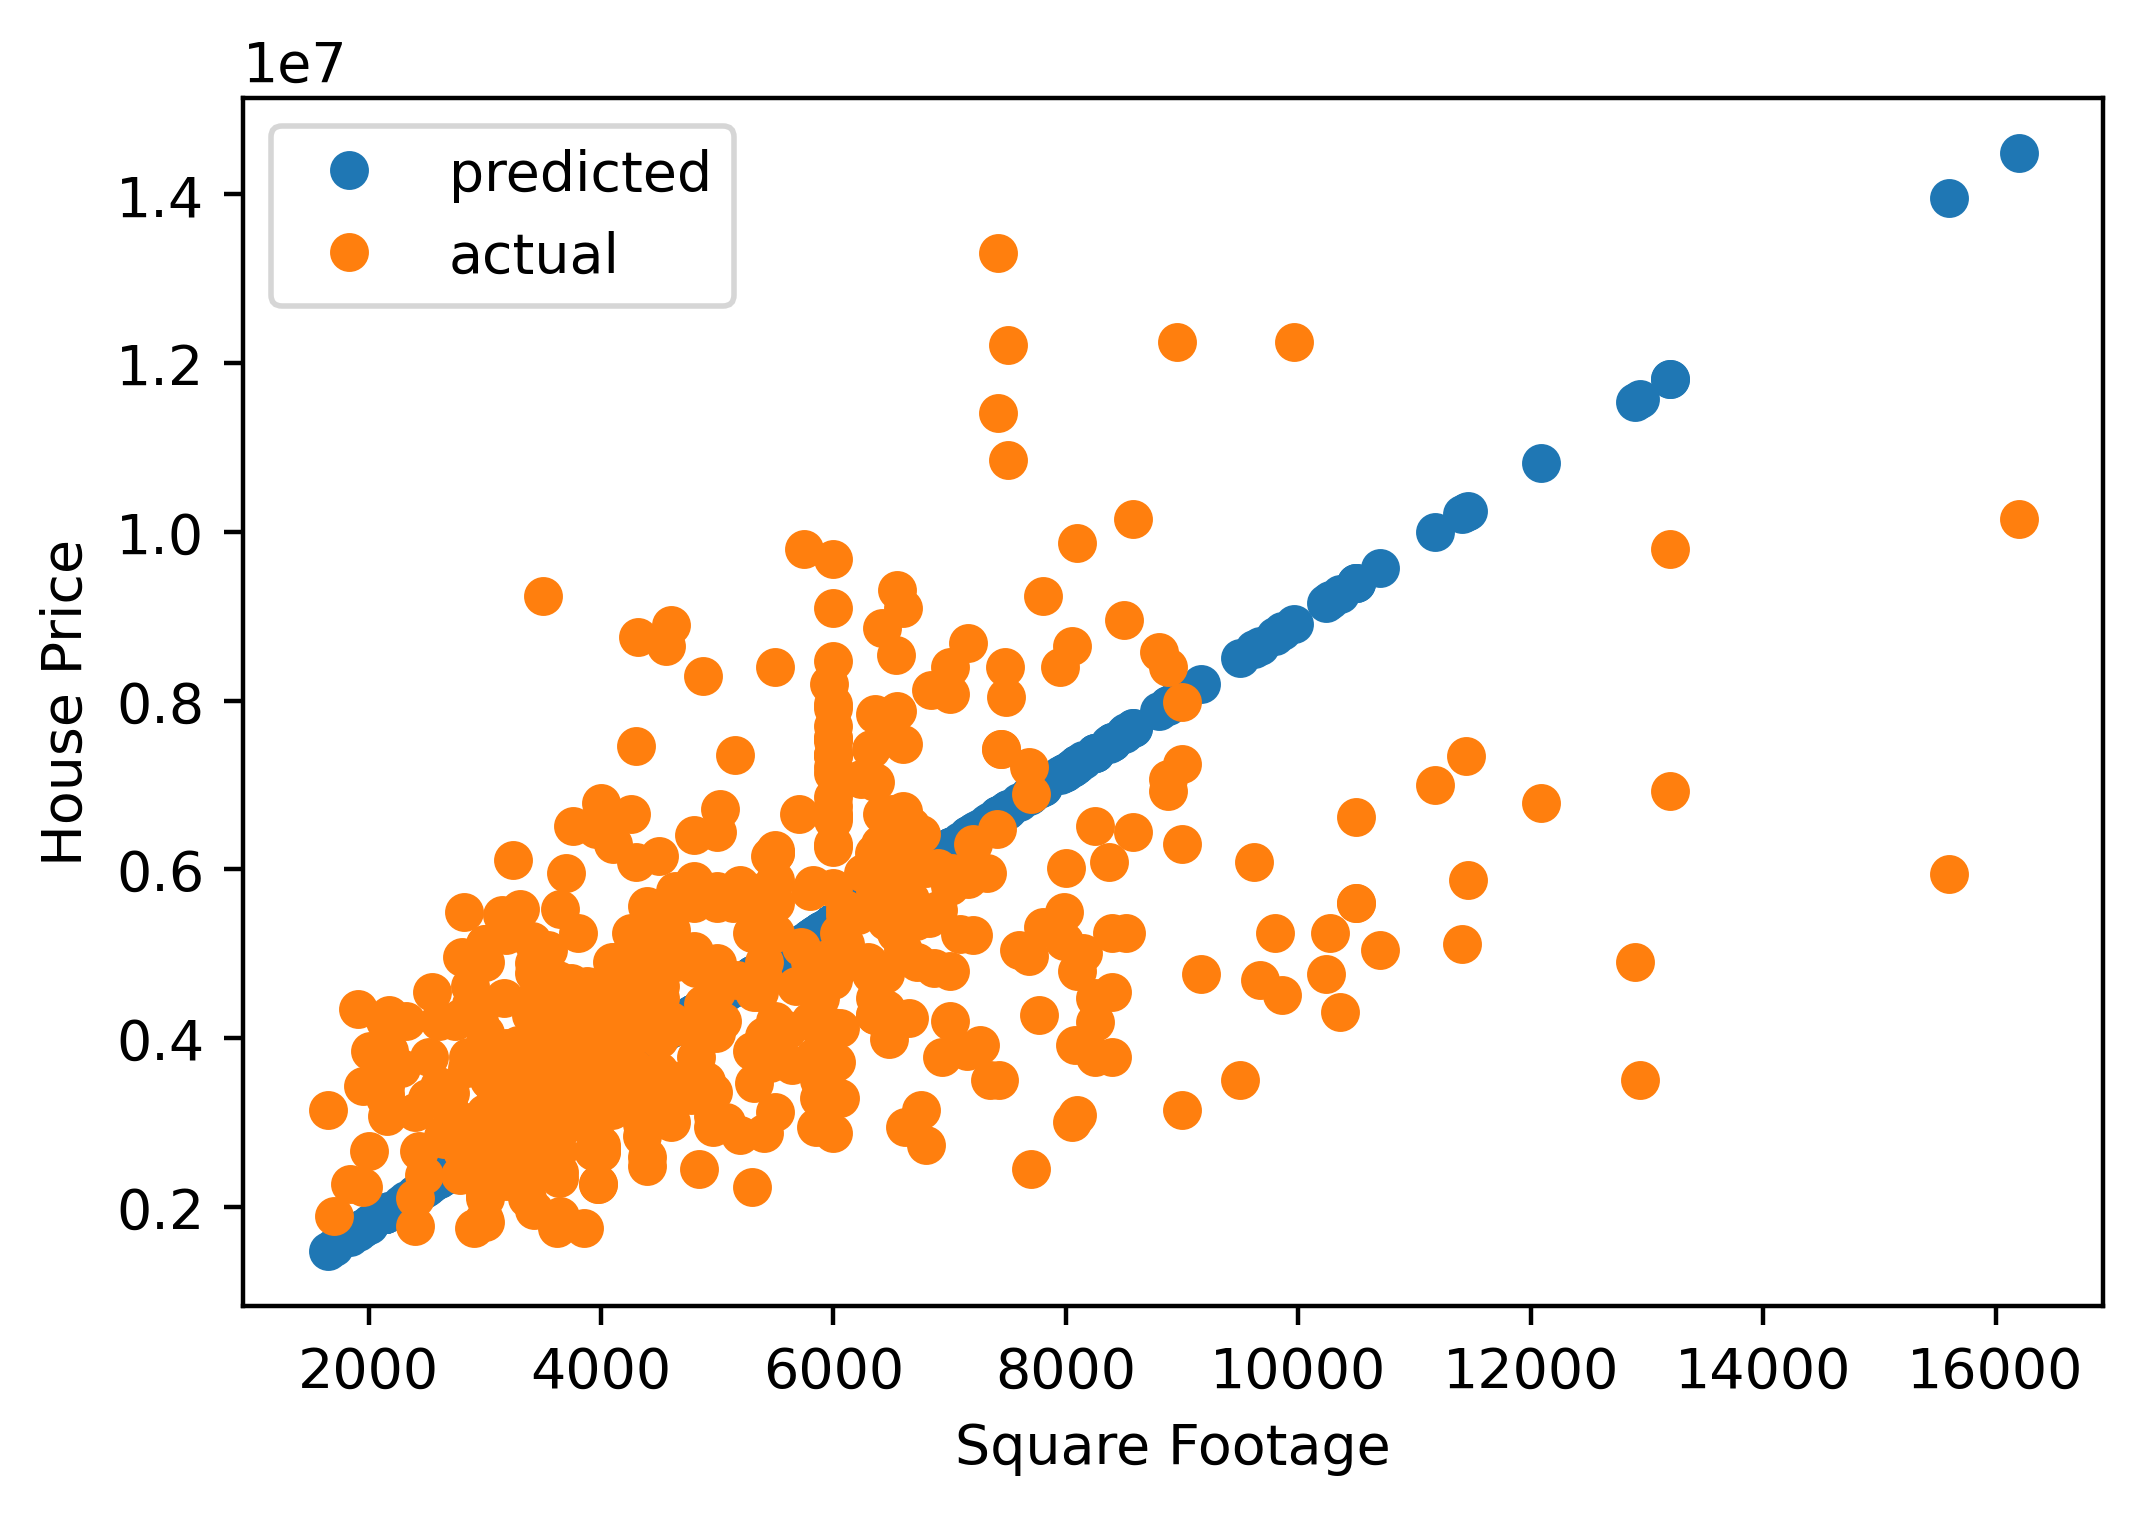

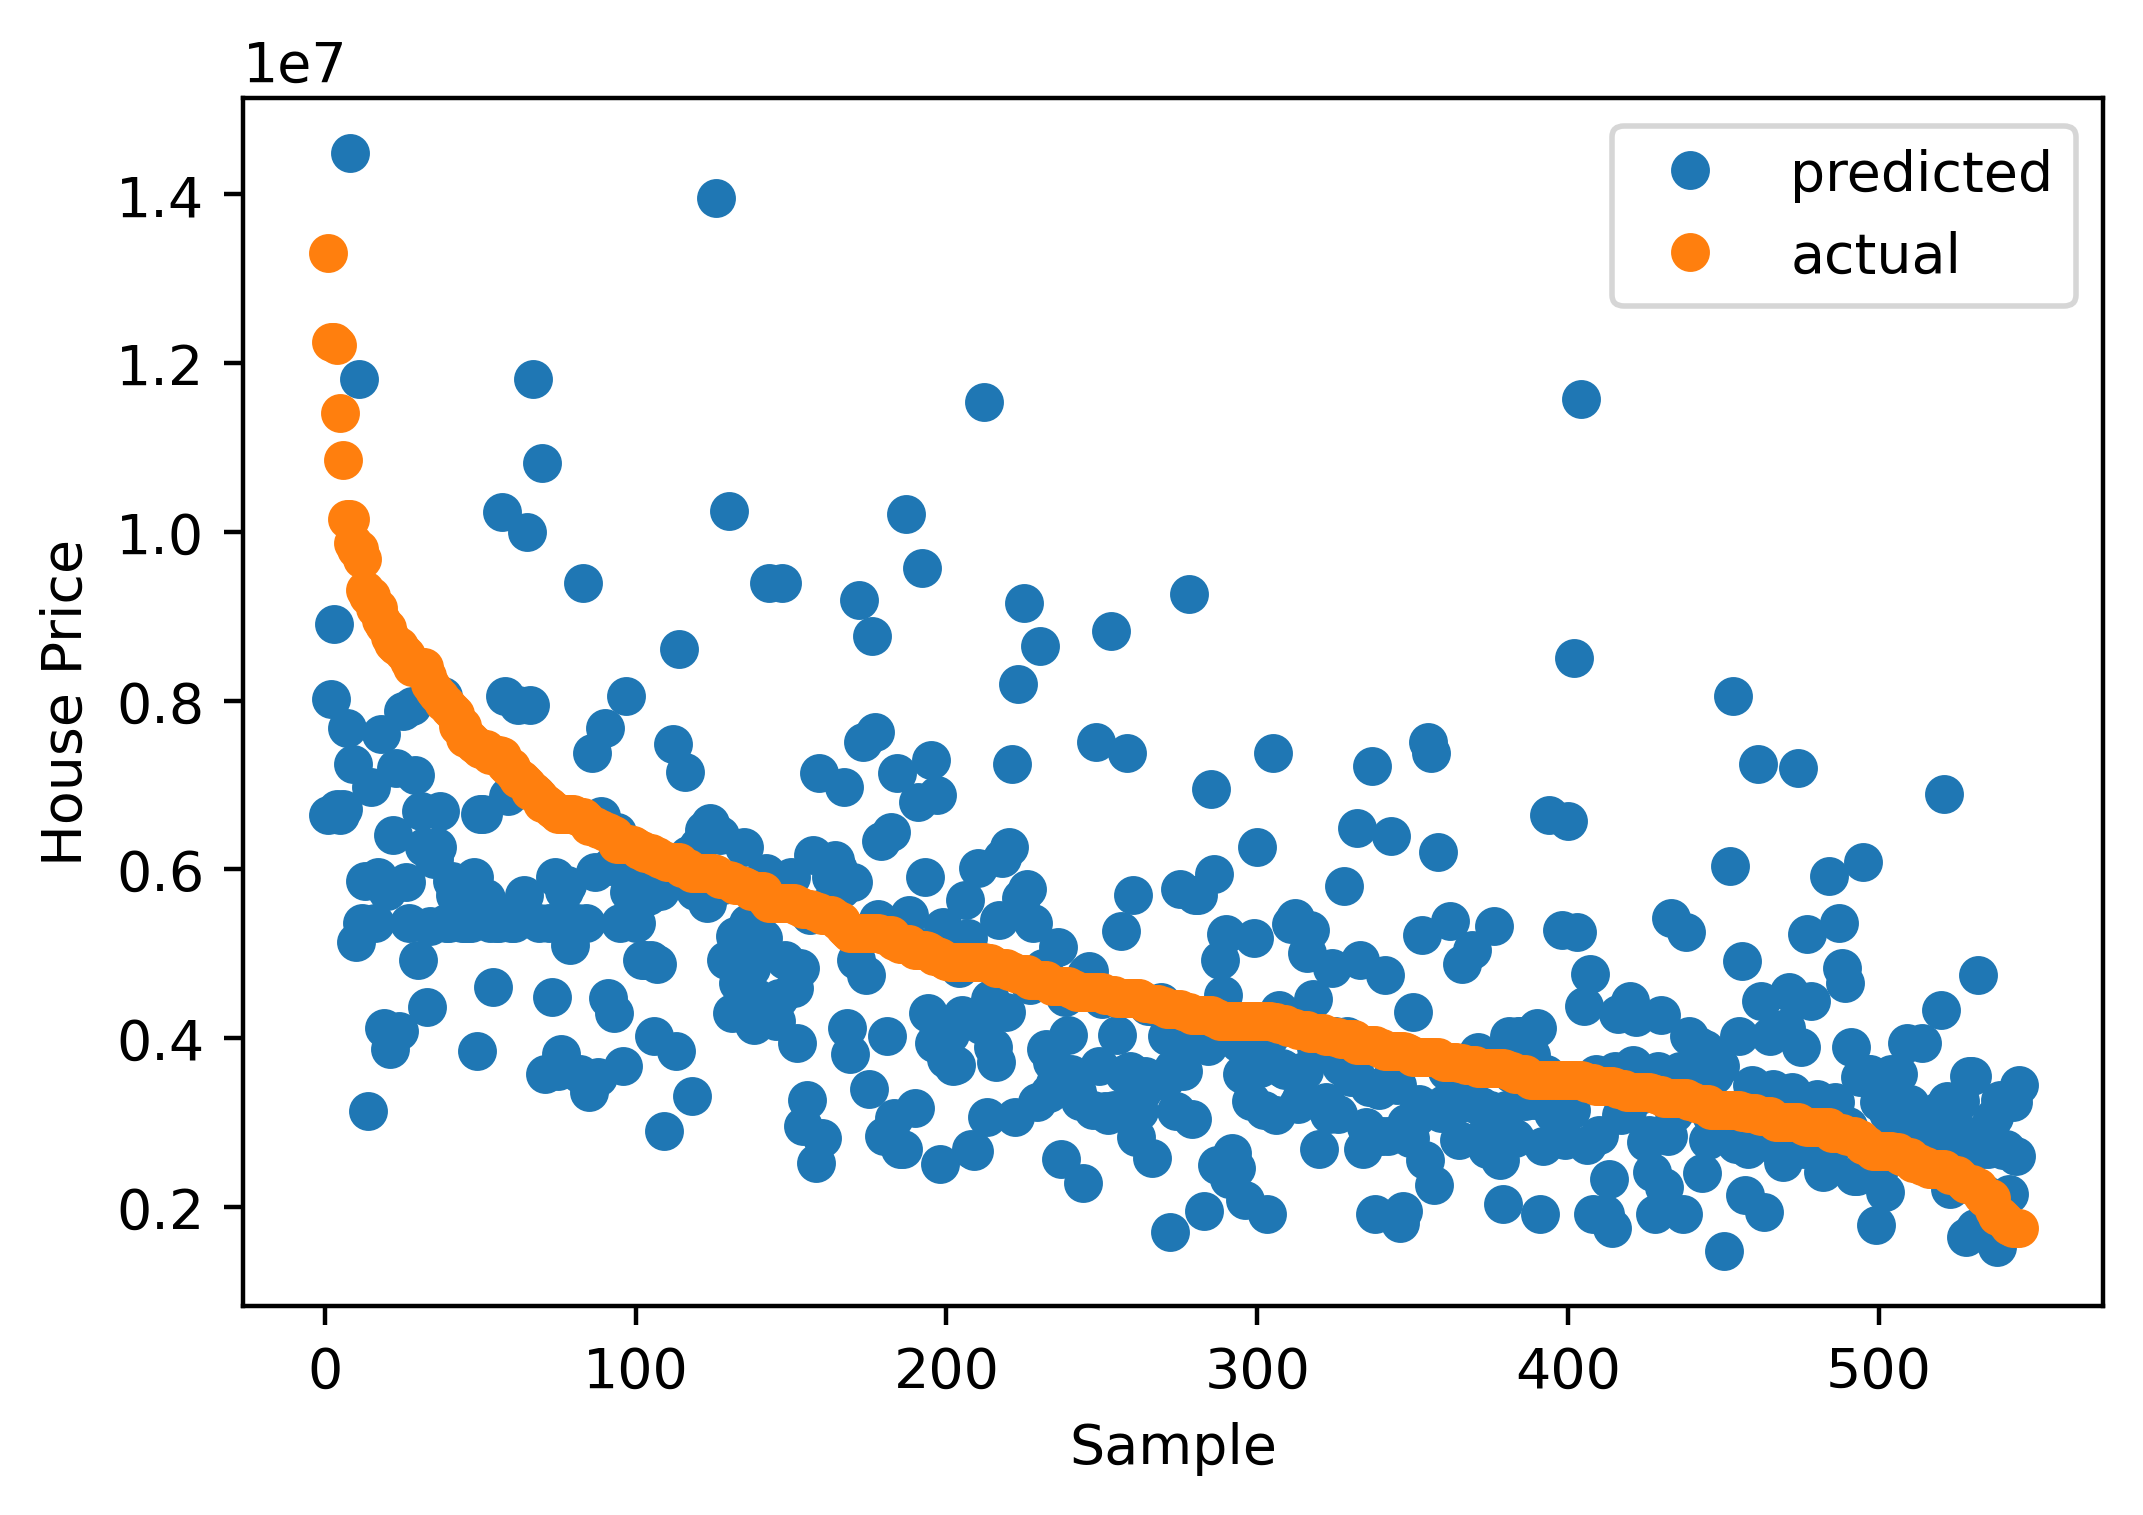

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)

fig = plt.figure(dpi=400)
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.plot(t_u[0].numpy(), t_p.detach().numpy(), 'o', label='predicted')
plt.plot(t_u[0].numpy(), t_c.numpy(), 'o', label='actual')
plt.legend(loc="upper left")
plt.savefig("problem3_linear.png", format="png")

fig = plt.figure(dpi=400)
plt.xlabel("Sample")
plt.ylabel("House Price")
plt.plot(range(1,546), t_p.detach(), 'o', label='predicted')
plt.plot(range(1,546), t_c.numpy(), 'o', label='actual')
plt.legend(loc="upper right")
plt.savefig("problem3_accuracies.png", format="png")